# ⚠️ EDIT "OPEN IN COLAB" BADGE PRIOR TO DOING ASSIGNMENT

<a target="_blank" href="https://colab.research.google.com/github/BenjaminHerrera/MAT422/blob/main/HW_x.x.ipynb">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# HW 3.4
# Benjamin Herrera
# 27 OCT 2024

# ⚠️ Run these commands prior to running anything

In [8]:
!pip install scipy
!pip install matplotlib
!pip install numpy
!pip install scikit-learn

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.0 MB 5.1 MB/s eta 0:00:03
    --------------------------------------- 0.2/11.0 MB 2.9 MB/s eta 0:00:04
   - -------------------------------------- 0.5/11.0 MB 4.3 MB/s eta 0:00:03
   --- ------------------------------------ 1.1/11.0 MB 6.1 MB/s eta 0:00:02
   ----- ---------------------------------- 1.6/11.0 MB 7.4 MB/s eta 0:00:02
   ------- -------------------------------- 2.2/11.0 MB 8.1 MB/s eta 0:00:02
   --------- ------------------------------ 2.7/11.0 MB 8.6 MB/s eta 0:00:01
   ----------- ---------------------------- 3.2/11.0 MB 8.8 MB/s eta 0:00:01
   ------------ --------------------------- 3.5/11.0 MB 8.7 MB/s eta 0:00:01
   -------------- ------------------------- 4.1/11.0 MB 9.0 MB/s eta 0:00:01
   ---------------- ----------------------- 4.6/11.0 MB 9.2 MB/s eta 0:00:01
   ------------------ --------------------- 5.2/11.0 MB 9.5 MB/s eta 0:00:01
   ---

## 🤔📈🤯 Logistic Regression

We use logistic regression if we are trying to predict a binary value. For example, given any image we want to see if it has at least a dog (1) or not (0). If we give a model an image of Queen Elizabeth's corgi to some logistic regression model, the model would output 1. If I showed an image of Nick Saban to the model, it would be 0. 

Ight, so picture this. We have a table dataset that looks like this:

$$\begin{array}{|c|c|}
\hline
\textbf{Image Vector Representation} (\vec{v}) & \textbf{Ground Truth} (g) \\
\hline
\vec{v}_1 & \text{1} \\
\hline
\vec{v}_2 & \text{0} \\
\hline
\vec{v}_3 & \text{1} \\
\hline
\vdots & \vdots \\
\hline
\vec{v}_{69} & \text{1} \\
\hline
\end{array}
$$

Which pretty much encapsulates the chapter's notation of (quoting from the chapter): $\{(\vec{v}_i, g_i) : i = 1, 2, 3, \dots, n\}$ where $\vec{v}_i \isin \Reals^d$ and $g_i \isin \{0, 1\}$. Applying the notation to above example, $n=69$. With this dataset in mind, we want to use logarithmic functions to map the features of the image vector representations to the model's prediction.

Now, what would this function look like? Well, here is what a log function looks like in general. 

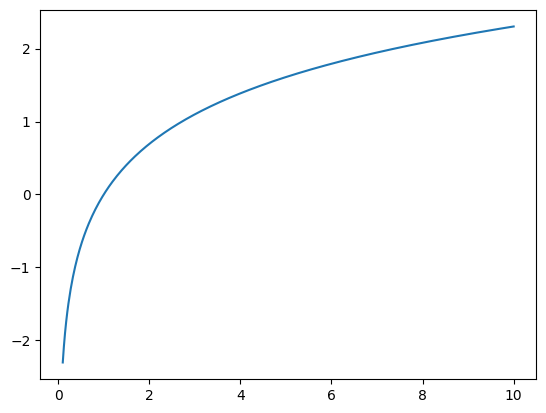

In [7]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np

# Get plot values
x = np.linspace(0.1, 10, 400) 
y = np.log(x)

# Plot a log function
plt.figure()
plt.plot(x, y)
plt.show()

However, we use a sigmoid function to help us define the difference between 0 and 1. This function is written as such:

$$f(x) = \frac{1}{1+e^{-x}}$$

When it's graphed it looks like this:

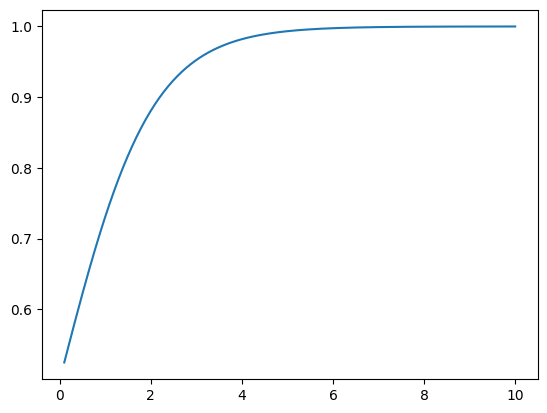

In [3]:
# Get values for a sigmoidd function
y_sigmoid = (lambda x: 1 / (1 + np.exp(-x)))(x)

# Plot a sigmoid function
plt.figure()
plt.plot(x, y_sigmoid)
plt.show()

Looks like a log function right? But it's different. However, we can also use a logit function, which is defined as such:

$$f(x) = \log(\frac{p(x)}{1 - p(x)})$$

When it's graphed, it looks like this:

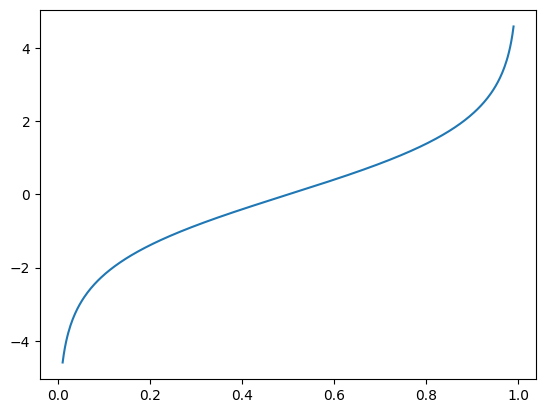

In [6]:
# Get values for a logit function
x = np.linspace(0.01, 0.99, 400)
y_logit = (lambda x: np.log(x / (1 - x)))(x)

# Plot a sigmoid function
plt.figure()
plt.plot(x, y_logit)
plt.show()

Much better! We can easily touch the 0 and 1 areas pretty well. Now, focusing on the logit function, we use the $x$ values as the probability of an independent value being mapped to a dependent value of 1. Now remember the previous chapters how we're trying to minimize some loss function? Well, we're going to be doing that here, too! Thinking this through an iterative approach, we are trying to figure out the set of parameters that minimizes the loss function between the model's prediction and the ground truth. You migh be wonering, what is the loss function? Don't worry, it's defined below (quoting from the chapter):

$$l(\vec{v}; A, g) = -\frac{1}{n}\sum_{i=1}^n{b_i \cdot \log(f(a^T\vec{v}))} - \frac{1}{n}\sum_{i=1}^n{(1-g_i)\log(1-f(a^T\vec{v}))}$$

where $A$ is the dataset, and $a$ is a the pair $(\vec{v}_i, g_i)$. With this defined, we are $\min_{x\isin\Reals^d}l(\vec{v}; A, g)$. Using gradient descent, we can update the log function to get a better performance of the prediction altogether. 

A cool thing is that we don't have to do this by hand. In fact, we can use the `sk-learn` library to do this! Going back to the dog classification example I talked about earlier, let's take a look on how we could achieve log regression on it.

In [15]:
# Import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Random image vector representations with a d=1
image_vectors = np.random.rand(100, 1)

# Random ground truth labels, though vecots >= 0.3 are 1 and not are 0
ground_truth = (image_vectors >= 0.3).astype(int).ravel()

# Spliting the data into a train and test splits
X_train, X_test, y_train, y_test = train_test_split(
    image_vectors, ground_truth, test_size=0.2, random_state=42
)

# Make a model and train it
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy:.2f}")

# Example prediction for a new image vector
new_image_vector = np.array([[0.5]])
predicted_label = model.predict(new_image_vector)
print(
    "Predicted label for the new image vector [0.5]: "
    f"{predicted_label[0]}"
)

Model accuracy: 0.90
Predicted label for the new image vector [0.5]: 1


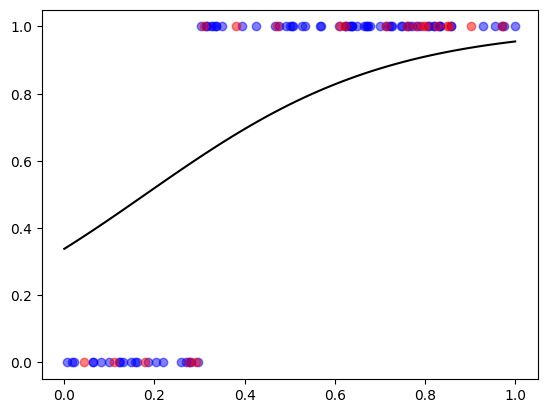

In [17]:
# Make values for the plot
x_range = np.linspace(0, 1, 100).reshape(-1, 1)
y_probs = model.predict_proba(x_range)[:, 1]

# Plot values
plt.figure()
plt.scatter(X_train, y_train, color='blue', alpha=0.5)
plt.scatter(X_test, y_test, color='red', alpha=0.5)
plt.plot(x_range, y_probs, color='black')
plt.show()

In the above graph, we see that we have sigmoid function that looks similar to the one we defined earlier (in a black line). In the graph, dots in blue are training points while dots in red are testing points.